In [3]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display
import math


In [4]:
flower = cv2.imread("./image/Flower1.jpg")
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
flower_gray


array([[176, 173, 171, ...,  24,  24,  24],
       [175, 173, 170, ...,  24,  24,  24],
       [175, 173, 170, ...,  23,  23,  23],
       ...,
       [110,  78,  52, ...,  60,  58,  57],
       [128,  95,  67, ...,  62,  60,  59],
       [144, 110,  80, ...,  64,  63,  61]], dtype=uint8)

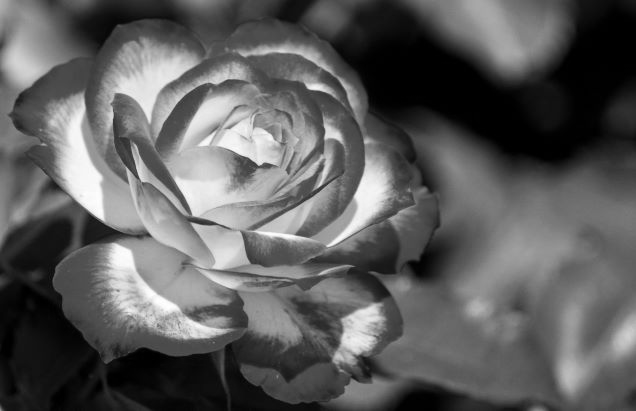

In [5]:
display(Image.fromarray(flower_gray))


Đảo ảnh


In [6]:
reverse_arr = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        reverse_arr[i, j] = 255 - flower_gray[i, j]
reverse_arr


array([[ 79,  82,  84, ..., 231, 231, 231],
       [ 80,  82,  85, ..., 231, 231, 231],
       [ 80,  82,  85, ..., 232, 232, 232],
       ...,
       [145, 177, 203, ..., 195, 197, 198],
       [127, 160, 188, ..., 193, 195, 196],
       [111, 145, 175, ..., 191, 192, 194]], dtype=uint8)

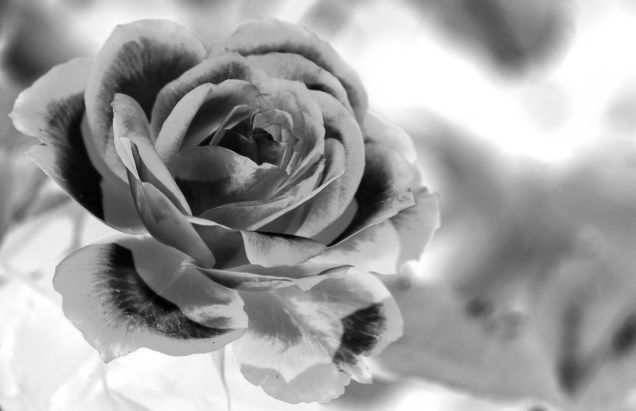

In [7]:
display(Image.fromarray(reverse_arr))


Cắt ngưỡng


In [8]:
threshold = 150
threshold_arr = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        r = flower_gray[i, j]
        threshold_arr[i, j] = 255 if r >= threshold else 0
threshold_arr


array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

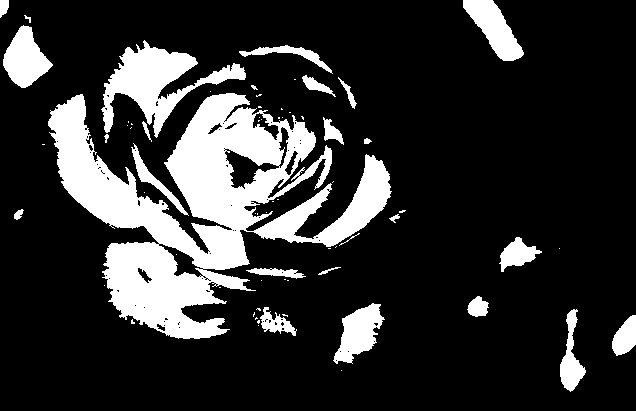

In [9]:
display(Image.fromarray(threshold_arr))


Biến đổi logarit


In [10]:
log_arr = np.array(flower_gray)
c = 10
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        log_arr[i, j] = c * math.log(1 + flower_gray[i, j])
log_arr


array([[51, 51, 51, ..., 32, 32, 32],
       [51, 51, 51, ..., 32, 32, 32],
       [51, 51, 51, ..., 31, 31, 31],
       ...,
       [47, 43, 39, ..., 41, 40, 40],
       [48, 45, 42, ..., 41, 41, 40],
       [49, 47, 43, ..., 41, 41, 41]], dtype=uint8)

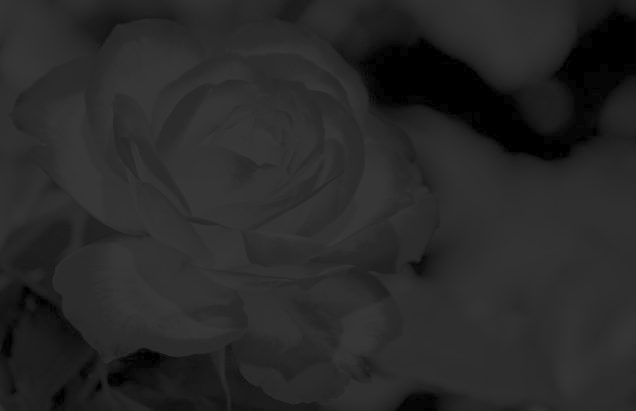

In [11]:
display(Image.fromarray(log_arr))


Biến đổi hàm mũ


In [12]:
gamma_arr = np.array(flower_gray)
c = 2
gamma = 0.6
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        gamma_arr[i, j] = c * math.pow(flower_gray[i, j], gamma)
gamma_arr

array([[44, 44, 43, ..., 13, 13, 13],
       [44, 44, 43, ..., 13, 13, 13],
       [44, 44, 43, ..., 13, 13, 13],
       ...,
       [33, 27, 21, ..., 23, 22, 22],
       [36, 30, 24, ..., 23, 23, 23],
       [39, 33, 27, ..., 24, 24, 23]], dtype=uint8)

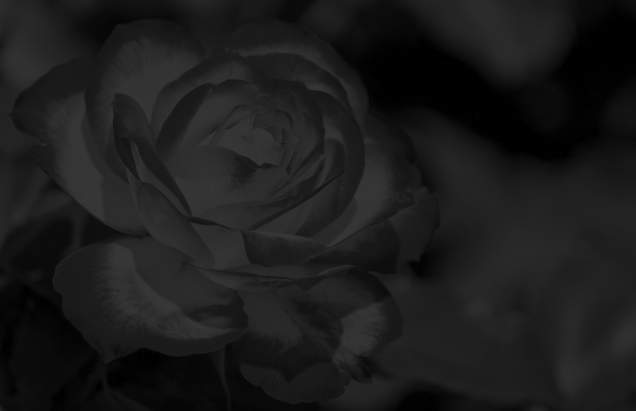

In [13]:
display(Image.fromarray(gamma_arr))

Cắt lát mức xám

In [14]:
grey_arr = np.array(flower_gray)
A = 100
B = 150
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        t = flower_gray[i, j]
        if (t < A) or (t > B):
            grey_arr[i, j] = 0
grey_arr


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [110,   0,   0, ...,   0,   0,   0],
       [128,   0,   0, ...,   0,   0,   0],
       [144, 110,   0, ...,   0,   0,   0]], dtype=uint8)

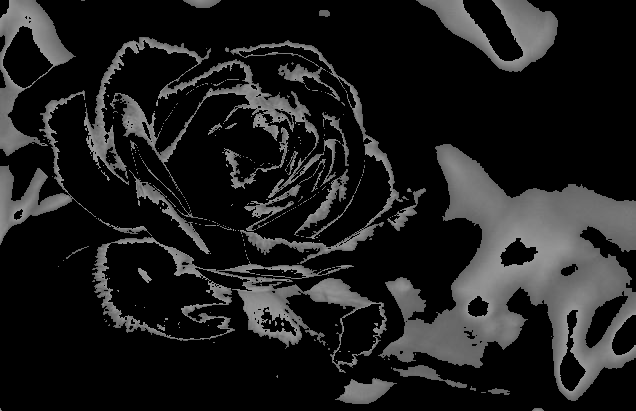

In [15]:
display(Image.fromarray(grey_arr))

Cắt lát mặt bit

In [16]:
binary_repr_v = np.vectorize(np.binary_repr)
bin_arr = binary_repr_v(flower_gray,256)

In [17]:
n = 5
bin_arr_res = np.array(flower_gray)
for i in range(flower_gray.shape[0]):
    for j in range(flower_gray.shape[1]):
        t = bin_arr[i,j][255-n+1]
        bin_arr_res[i,j] = ((int) (t)) * (math.pow(2,n-1))
bin_arr_res

array([[16,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       [ 0,  0,  0, ..., 16, 16, 16],
       ...,
       [ 0,  0, 16, ..., 16, 16, 16],
       [ 0, 16,  0, ..., 16, 16, 16],
       [16,  0, 16, ...,  0, 16, 16]], dtype=uint8)

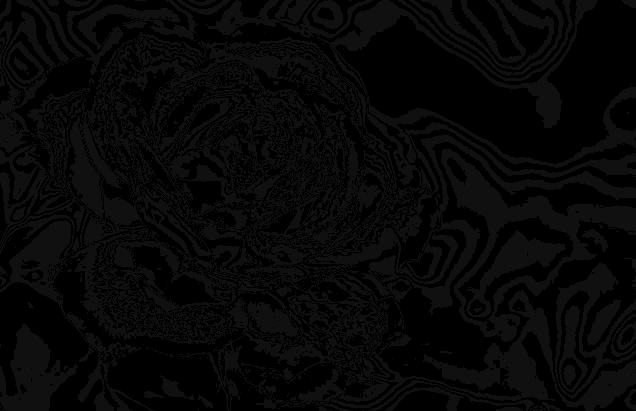

In [18]:
display(Image.fromarray(bin_arr_res))

Cân bằng histogram

In [28]:
def compute_hist(img):
    hist = np.zeros((256,), np.uint8)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    return hist

def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    new_hist = np.uint8(new_hist)
    return new_hist

In [29]:
hist = compute_hist(flower_gray).ravel()
new_hist = equal_hist(hist)
h, w = flower_gray.shape[:2]
hist_img = np.array(flower_gray)
for i in range(h):
   for j in range(w):
       hist_img[i,j] = new_hist[flower_gray[i,j]]

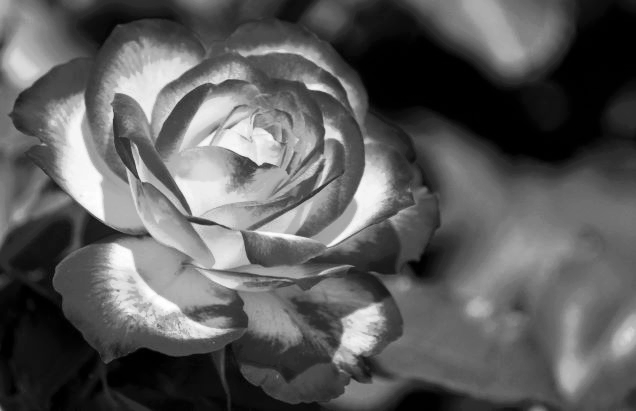

In [30]:
display(Image.fromarray(hist_img))

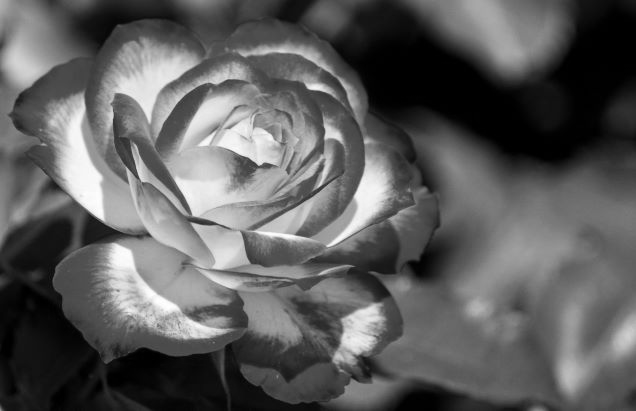

In [31]:
display(Image.fromarray(flower_gray))